In [13]:
import pandas as pd
import numpy as np
import csv
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#https://logomakr.com/5Tnnpu

almashaeir المشاعر

In [4]:
#http://www.consortium.ri.cmu.edu/ckagree/index.cgi

In [5]:
#https://www.paralleldots.com/facial-emotion

In [6]:
#https://www.viasto.com/en/

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

train.csv contains two columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image. The contents of this string a space-separated pixel values in row major order. test.csv contains only the "pixels" column and your task is to predict the emotion column.

The training set consists of 28,709 examples. The public test set used for the leaderboard consists of 3,589 examples. The final test set, which was used to determine the winner of the competition, consists of another 3,589 examples.

This dataset was prepared by Pierre-Luc Carrier and Aaron Courville, as part of an ongoing research project. They have graciously provided the workshop organizers with a preliminary version of their dataset to use for this contest.

In [7]:
data = pd.read_csv("./fer2013/fer2013/fer2013.csv") 

In [8]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


Pasar a lista los valores de los pixeles

In [9]:
pixels=list(data['pixels'])

In [10]:
for i in range(len(pixels)): 
    pixels[i] = pixels[i].split(" ") 
    for j in range(len(pixels[i])): 
        pixels[i][j] = int(pixels[i][j])

In [11]:
for i in range(len(pixels)):
            pixels[i]=np.array(pixels[i])

In [12]:
data['pixels']= pixels

In [13]:
data.head()

,emotion,pixels,Usage
0,0,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4...",Training
1,0,"[151, 150, 147, 155, 148, 133, 111, 140, 170, ...",Training
2,2,"[231, 212, 156, 164, 174, 138, 161, 173, 182, ...",Training
3,4,"[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2...",Training
4,6,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23...",Training


In [ ]:
'''
np.fromstring('1 2', dtype=int, sep=' ')
array([1, 2])
'''

In [18]:
data['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1])

In [19]:
data['emotion'][0].dtype

dtype('int64')

In [14]:
emotions = ('Angry', 'Disgust','Fear','Happy','Sad','Surprise','Neutral')
data['emotion_name']=data.emotion.apply(lambda x: emotions[x])
data

,emotion,pixels,Usage,emotion_name
0,0,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4...",Training,Angry
1,0,"[151, 150, 147, 155, 148, 133, 111, 140, 170, ...",Training,Angry
2,2,"[231, 212, 156, 164, 174, 138, 161, 173, 182, ...",Training,Fear
3,4,"[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2...",Training,Sad
4,6,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23...",Training,Neutral
...,...,...,...,...
35882,6,"[50, 36, 17, 22, 23, 29, 33, 39, 34, 37, 37, 3...",PrivateTest,Neutral
35883,3,"[178, 174, 172, 173, 181, 188, 191, 194, 196, ...",PrivateTest,Happy
35884,0,"[17, 17, 16, 23, 28, 22, 19, 17, 25, 26, 20, 2...",PrivateTest,Angry
35885,3,"[30, 28, 28, 29, 31, 30, 42, 68, 79, 81, 77, 6...",PrivateTest,Happy


In [20]:
pixels=list(data['pixels'])

In [ ]:
norm = [float(i)/sum(pixels[0]) for i in pixels[0]]

ATENCION: Normalizar entre 0 y 1 los valores de los pixeles

In [14]:
data.Usage.unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [15]:
data.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


#### ATENCIÓN: Balancear datos

In [19]:
data.emotion_name.value_counts()

Happy       8989
Neutral     6198
Sad         6077
Fear        5121
Angry       4953
Surprise    4002
Disgust      547
Name: emotion_name, dtype: int64

-----------------------------------------------------------------------------------------------------------------

In [5]:
database_path = '/home/clara/Desktop/ALMA-share/fer2013/fer2013/'
datasets_path = './fer2013/'
csv_file = database_path+'fer2013.csv'
train_csv = datasets_path+'train.csv'
val_csv = datasets_path+'val.csv'
test_csv = datasets_path+ 'test.csv'


with open(csv_file) as f:
    csvr = csv.reader(f)
    header = next(csvr)
    print(header)
    rows = [row for row in csvr]
    
    trn = [row[:-1] for row in rows if row[-1] == 'Training']
    csv.writer(open(train_csv, 'w+'), lineterminator='\n').writerows([header[:-1]] + trn)
    print(len(trn))

    val = [row[:-1] for row in rows if row[-1] == 'PublicTest']
    csv.writer(open(val_csv, 'w+'), lineterminator='\n').writerows([header[:-1]] + val)
    print(len(val))        

    tst = [row[:-1] for row in rows if row[-1] == 'PrivateTest']
    csv.writer(open(test_csv, 'w+'), lineterminator='\n').writerows([header[:-1]] + tst)
    print(len(tst))

['emotion', 'pixels', 'Usage']
28709
3589
3589


In [10]:
train_csv = os.path.join(datasets_path, 'train.csv')
val_csv = os.path.join(datasets_path, 'val.csv')
test_csv = os.path.join(datasets_path, 'test.csv')

train_set = os.path.join(datasets_path, 'train')
val_set = os.path.join(datasets_path, 'val')
test_set = os.path.join(datasets_path, 'test')

for save_path, csv_file in [(train_set, train_csv), (val_set, val_csv), (test_set, test_csv)]:
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    num = 1
    with open(csv_file) as f:
        csvr = csv.reader(f)
        header = next(csvr)
        for i, (label, pixel) in enumerate(csvr):
            pixel = np.asarray([float(p) for p in pixel.split()]).reshape(48, 48)
            subfolder = os.path.join(save_path, label)
            if not os.path.exists(subfolder):
                os.makedirs(subfolder)
            im = Image.fromarray(pixel).convert('L')
            image_name = os.path.join(subfolder, '{:05d}.jpg'.format(i))
            im.save(image_name)

In [11]:
training = pd.read_csv("./fer2013/train.csv") 

In [12]:
training

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


In [13]:
emotions = ('Angry', 'Disgust','Fear','Happy','Sad','Surprise','Neutral')
training['emotion_name']=training.emotion.apply(lambda x: emotions[x])
training.head()

,emotion,pixels,emotion_name
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Angry
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Angry
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Fear
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Sad
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Neutral


In [18]:
training.emotion_name.value_counts()

Happy       7215
Neutral     4965
Sad         4830
Fear        4097
Angry       3995
Surprise    3171
Disgust      436
Name: emotion_name, dtype: int64

----------------------------------------------------------------------------------------------------------------

In [9]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
import cv2
import json
from keras.models import model_from_json

In [26]:
with open('Model_0.6355897784233093_15-19-22.h5.json','r') as f:
    model_json = json.load(f)
model = model_from_json(model_json)
model.load_weights('Model_0.6355897784233093_15-19-22.h5')

In [18]:
def transfImag(path):
    print ('transforming image from {}'.format(path))

    input_img=cv2.imread(path)
    input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(input_img, 1.25, 6)
    x,y,w,h = faces[0]
    img_data= input_img[y:y+h,x:x+w]
    img_data=cv2.resize(img_data,(48,48))
    
    img_data = np.stack(img_data)
    img_data = img_data / 255.0
    
    return img_data

transforming image from real_pics/13.jpg
(1, 48, 48, 1)
Probs -> angry:0.29152 disgust:0.64832 fear:0.03578 happy:0.00001 sadness:0.02429 surprise:0.00008


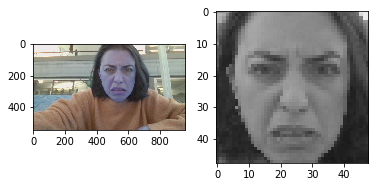

In [36]:
PIC = transfImag('real_pics/13.jpg') # transform pic
input_img=cv2.imread('real_pics/13.jpg') # get the array of the original pic

plt.subplot(121)
plt.imshow(input_img) # original pic
plt.subplot(122)
plt.imshow(Image.fromarray(PIC.squeeze()*255)) # transformed pic

PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 48, 48, 1)
print(PIC.shape)
pred2 = model.predict(PIC)[0]
print("Probs -> angry:{0:.5f} disgust:{1:.5f} fear:{2:.5f} happy:{3:.5f} sadness:{4:.5f} surprise:{5:.5f}".format(pred2[0],pred2[1],pred2[2],pred2[3],pred2[4],pred2[5]))